In [ ]:
import pandas as pd
boundaries_df_origin = pd.read_csv('G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835od/cellpose_cell_boundaries_1835od.csv')
print("Data boundaries table file successfully")

boundaries_df_origin

Data boundaries table file successfully


,cell_id,vertex_x,vertex_y
0,1,12928,3062
1,1,12928,3064
2,1,12928,3066
3,1,12928,3068
4,1,12928,3070
...,...,...,...
106079,2293,12155,20106
106080,2293,12156,20104
106081,2293,12157,20102
106082,2293,12156,20100


In [17]:
boundaries_df = boundaries_df_origin

In [18]:
# Apply rescaling factor to vertex_x and vertex_y
rescale_factor = 0.2125
boundaries_df['vertex_x'] = boundaries_df['vertex_x'] * rescale_factor
boundaries_df['vertex_y'] = boundaries_df['vertex_y'] * rescale_factor

In [52]:
boundaries_df

,cell_id,vertex_x,vertex_y
0,1,2747.2000,650.675
1,1,2747.2000,651.100
2,1,2747.2000,651.525
3,1,2747.2000,651.950
4,1,2747.2000,652.375
...,...,...,...
106079,2293,2582.9375,4272.525
106080,2293,2583.1500,4272.100
106081,2293,2583.3625,4271.675
106082,2293,2583.1500,4271.250


In [56]:
# Assuming transcripts_assigned_ture is your DataFrame
output_path = "G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835od/1835od_cell_boundaries.csv"

# Save the DataFrame as a Parquet file
boundaries_df.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835od/1835od_cell_boundaries.csv


In [4]:
# Read Xenium transcripts output
# Read in the parquet file, edit path to where parquet file saved
transcripts_original = pd.read_parquet('G:/Alexis_data/Project/SpatialOmics_cellpose/data/output-XETG00245__0034182__1835od__20240613__195055/transcripts.parquet')

# Print information about the data frame
transcripts_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356517 entries, 0 to 4356516
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   transcript_id     uint64 
 1   cell_id           object 
 2   overlaps_nucleus  uint8  
 3   feature_name      object 
 4   x_location        float32
 5   y_location        float32
 6   z_location        float32
 7   qv                float32
 8   fov_name          object 
 9   nucleus_distance  float32
 10  codeword_index    int32  
dtypes: float32(5), int32(1), object(3), uint64(1), uint8(1)
memory usage: 236.8+ MB


In [5]:
transcripts_original

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
0,281535106259218,UNASSIGNED,0,Rho,207.373856,1487.990112,11.548668,40.000000,O7,258.283966,399
1,281535106260670,UNASSIGNED,0,Igfbp6,145.734924,1463.533569,11.367358,12.198106,O7,318.637451,374
2,281535106260671,UNASSIGNED,0,Rgs5,176.517212,1447.958008,11.383772,40.000000,O7,295.260834,230
3,281535106262920,UNASSIGNED,0,NegControlProbe_00009,149.262360,1456.542603,11.828192,11.518659,O7,320.277985,305
4,281535106275236,UNASSIGNED,0,Ncf4,189.197723,1490.405762,11.623667,40.000000,O7,268.832794,84
...,...,...,...,...,...,...,...,...,...,...,...
4356512,281590940833089,lgnfnicp-1,1,Anxa8,4163.737793,3634.113525,18.601751,38.929401,Q13,0.000000,354
4356513,281590940833092,UNASSIGNED,0,Snap25,4186.839355,3564.028076,14.559555,40.000000,Q13,69.774994,5
4356514,281590940833307,UNASSIGNED,0,Tmem176b,4058.477295,3551.313232,14.496567,40.000000,Q13,128.730927,405
4356515,281590940833309,UNASSIGNED,0,Vsx2,4085.540527,3630.102539,14.292440,29.514473,Q13,71.751923,359


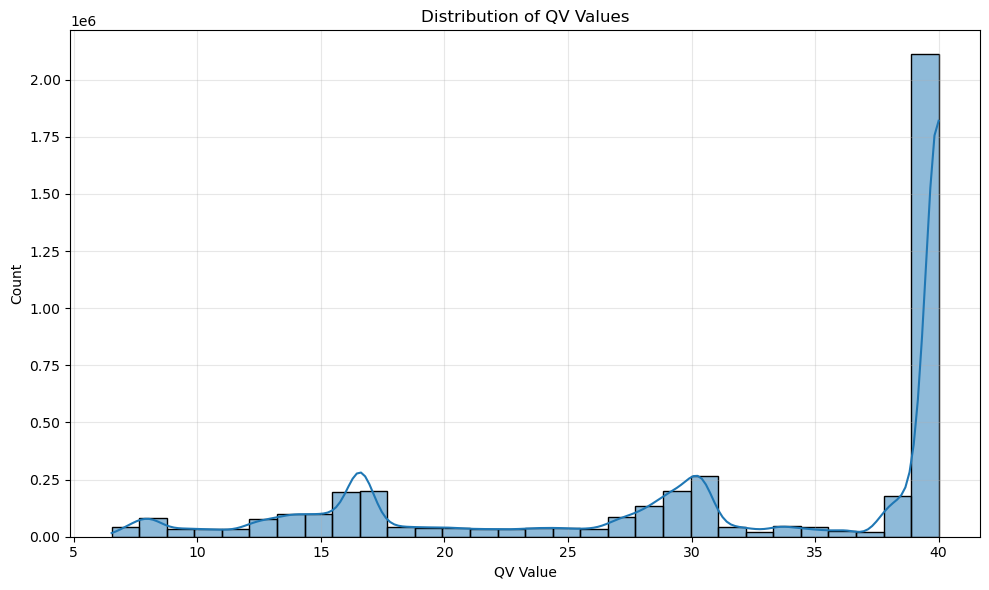

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create distribution plot using seaborn
sns.histplot(data=transcripts_original, x='qv', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of QV Values')
plt.xlabel('QV Value')
plt.ylabel('Count')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Distribution plot for negtive control

In [8]:
# Filter transcripts with qv score > 20
transcripts_filtered = transcripts_original[transcripts_original['qv'] > 20]

# Print information about the filtered dataframe
print("Original number of transcripts:", len(transcripts_original))
print("Number of transcripts after filtering (qv > 20):", len(transcripts_filtered))
print("\nPercentage of transcripts retained:", 
      round(len(transcripts_filtered) / len(transcripts_original) * 100, 2), "%")

# Display first few rows of filtered dataframe
print("\nFirst few rows of filtered data:")
print(transcripts_filtered.head())

Original number of transcripts: 4356517
Number of transcripts after filtering (qv > 20): 3382683

Percentage of transcripts retained: 77.65 %

First few rows of filtered data:
     transcript_id     cell_id  overlaps_nucleus feature_name  x_location  \
0  281535106259218  UNASSIGNED                 0          Rho  207.373856   
2  281535106260671  UNASSIGNED                 0         Rgs5  176.517212   
4  281535106275236  UNASSIGNED                 0         Ncf4  189.197723   
5  281535106278910  UNASSIGNED                 0          Srf  116.123260   
6  281535106278914  UNASSIGNED                 0          Srf  204.037155   

    y_location  z_location         qv fov_name  nucleus_distance  \
0  1487.990112   11.548668  40.000000       O7        258.283966   
2  1447.958008   11.383772  40.000000       O7        295.260834   
4  1490.405762   11.623667  40.000000       O7        268.832794   
5  1482.012695   11.507800  21.460453       O7        329.056824   
6  1463.066162   11.5

In [9]:
transcripts_b4_assign = transcripts_filtered


In [10]:
import pandas as pd
from shapely.geometry import Point, Polygon

# Load the polygon coordinates from CSV
polygon_coords_csv = r'G:/Alexis_data/Project/SpatialOmics_cellpose/data/output-XETG00245__0034182__1835od__20240613__195055/1835od_corneasection.csv'
polygon_coords = pd.read_csv(polygon_coords_csv)

# Extract the X and Y coordinates and create a polygon
x_coords = polygon_coords['X']
y_coords = polygon_coords['Y']
polygon = Polygon(zip(x_coords, y_coords))

# Load the transcripts data
transcripts_b4_cut = transcripts_b4_assign


# Initialize a counter
processed_count = 0

# Filter transcripts to retain only those within the polygon
def is_inside_polygon(row):
    global processed_count
    point = Point(row["x_location"], row["y_location"])
    processed_count += 1
    if processed_count % 10000 == 0:  # Print every 100 rows processed
        print(f"Processed {processed_count} transcripts...")
    return polygon.contains(point)

transcripts_filtered = transcripts_b4_cut[
    transcripts_b4_cut.apply(is_inside_polygon, axis=1)
]

Processed 10000 transcripts...
Processed 20000 transcripts...
Processed 30000 transcripts...
Processed 40000 transcripts...
Processed 50000 transcripts...
Processed 60000 transcripts...
Processed 70000 transcripts...
Processed 80000 transcripts...
Processed 90000 transcripts...
Processed 100000 transcripts...
Processed 110000 transcripts...
Processed 120000 transcripts...
Processed 130000 transcripts...
Processed 140000 transcripts...
Processed 150000 transcripts...
Processed 160000 transcripts...
Processed 170000 transcripts...
Processed 180000 transcripts...
Processed 190000 transcripts...
Processed 200000 transcripts...
Processed 210000 transcripts...
Processed 220000 transcripts...
Processed 230000 transcripts...
Processed 240000 transcripts...
Processed 250000 transcripts...
Processed 260000 transcripts...
Processed 270000 transcripts...
Processed 280000 transcripts...
Processed 290000 transcripts...
Processed 300000 transcripts...
Processed 310000 transcripts...
Processed 320000 

In [11]:
transcripts_assigned = transcripts_filtered
cell_boundaries = boundaries_df
transcripts_assigned

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
411127,281483566645252,UNASSIGNED,0,Anxa2,840.654114,706.035034,13.348404,40.000000,M8,30.819649,171
411128,281483566645253,UNASSIGNED,0,Anxa2,843.771484,740.642700,13.298129,40.000000,M8,11.712226,171
411129,281483566645254,UNASSIGNED,0,Anxa2,851.820190,701.773804,13.331459,40.000000,M8,25.738132,171
411130,281483566645255,ecljjmhd-1,0,Ifitm3,852.006409,741.725586,13.604462,29.410353,M8,4.169478,424
411134,281483566645259,ecljjmhd-1,1,Xbp1,858.364502,741.696838,17.397814,26.657335,M8,0.000000,416
...,...,...,...,...,...,...,...,...,...,...,...
4349924,281560876057413,UNASSIGNED,0,Cryab,3754.554688,2500.984863,14.903770,40.000000,P13,74.393150,180
4349972,281560876058358,UNASSIGNED,0,Aqp3,3755.097168,2503.875732,14.937694,40.000000,P13,72.065758,191
4350065,281560876063114,UNASSIGNED,0,Krt7,3754.957031,2516.151123,14.989378,40.000000,P13,61.395161,417
4350372,281560876072408,UNASSIGNED,0,Ndufs8,3754.885010,2507.699951,15.140697,29.968203,P13,68.601860,141


In [19]:
cell_boundaries = boundaries_df


In [20]:
import pandas as pd
from shapely.geometry import Point, Polygon
from rtree import index

# Create R-Tree spatial index and polygons
spatial_index = index.Index()
cell_polygons = {}

for cell_id, group in cell_boundaries.groupby("cell_id"):
    polygon = Polygon(zip(group["vertex_x"], group["vertex_y"]))
    cell_polygons[cell_id] = polygon
    spatial_index.insert(cell_id, polygon.bounds)

# Initialize a counter
processed_count = 0

# Optimized function to find the cell_id for a given x, y location
def find_cell_id_optimized(x, y):
    global processed_count
    point = Point(x, y)
    possible_matches = list(spatial_index.intersection((x, y, x, y)))
    for cell_id in possible_matches:
        if cell_polygons[cell_id].contains(point):
            return cell_id
    return "UNASSIGNED"

# Modified function to handle progress tracking with R-Tree
def process_with_progress(transcripts_df):
    global processed_count
    results = []
    for index, row in transcripts_df.iterrows():
        cell_id = find_cell_id_optimized(row["x_location"], row["y_location"])
        results.append(cell_id)
        processed_count += 1
        if processed_count % 10000 == 0:  # Print every 1000 rows processed
            print(f"Processed {processed_count} transcripts...")
    return results

# Assign cell_id with progress tracking
transcripts_assigned["cell_id"] = process_with_progress(transcripts_assigned)

print("Processing complete!")


Processed 10000 transcripts...
Processed 20000 transcripts...
Processed 30000 transcripts...
Processed 40000 transcripts...
Processed 50000 transcripts...
Processed 60000 transcripts...
Processed 70000 transcripts...
Processed 80000 transcripts...
Processed 90000 transcripts...
Processed 100000 transcripts...
Processed 110000 transcripts...
Processed 120000 transcripts...
Processed 130000 transcripts...
Processed 140000 transcripts...
Processed 150000 transcripts...
Processed 160000 transcripts...
Processed 170000 transcripts...
Processed 180000 transcripts...
Processed 190000 transcripts...
Processed 200000 transcripts...
Processed 210000 transcripts...
Processed 220000 transcripts...
Processed 230000 transcripts...
Processed 240000 transcripts...
Processed 250000 transcripts...
Processed 260000 transcripts...
Processed 270000 transcripts...
Processed 280000 transcripts...
Processed 290000 transcripts...
Processed 300000 transcripts...
Processed 310000 transcripts...
Processed 320000 

C:\Users\Alexis\AppData\Local\Temp\ipykernel_57768\146154260.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_assigned["cell_id"] = process_with_progress(transcripts_assigned)


In [21]:
# Filter rows where cell_id is not "UNASSIGNED"
transcripts_assigned_ture = transcripts_assigned[transcripts_assigned["cell_id"] != "UNASSIGNED"]

# Display the result
transcripts_assigned_ture
  
# save as parquet
# G:\Alexis_data\Project\Cellpose_seg\csv_output

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
411135,281483566645260,777,0,Anxa2,858.498596,732.991638,16.444838,39.473747,M8,1.634967,171
411136,281483566645261,777,1,Anxa2,859.023682,735.910461,13.478305,39.473747,M8,0.000000,171
411138,281483566645263,777,0,Anxa2,859.426392,733.931763,13.570921,39.473747,M8,0.680786,171
411140,281483566645265,777,1,Muc1,860.072144,736.372314,16.737610,29.887745,M8,0.000000,195
411146,281483566645272,778,0,Anxa2,863.600708,733.520874,14.054847,39.473747,M8,1.304138,171
...,...,...,...,...,...,...,...,...,...,...,...
4342397,281590940833230,1662,0,Krt19,3619.765137,3060.981934,17.844675,39.435364,Q13,0.344238,14
4342400,281590940833237,1662,1,Krt19,3620.973877,3057.656494,15.754407,40.000000,Q13,0.000000,14
4342401,281590940833241,1654,1,S100a14,3621.613281,3019.339355,16.543934,33.374100,Q13,0.000000,173
4342402,281590940833244,1651,0,Krt19,3621.947266,3003.608643,18.215641,36.269390,Q13,0.115234,14


In [24]:
transcripts_assigned_ture

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
411135,281483566645260,777,0,Anxa2,858.498596,732.991638,16.444838,39.473747,M8,1.634967,171
411136,281483566645261,777,1,Anxa2,859.023682,735.910461,13.478305,39.473747,M8,0.000000,171
411138,281483566645263,777,0,Anxa2,859.426392,733.931763,13.570921,39.473747,M8,0.680786,171
411140,281483566645265,777,1,Muc1,860.072144,736.372314,16.737610,29.887745,M8,0.000000,195
411146,281483566645272,778,0,Anxa2,863.600708,733.520874,14.054847,39.473747,M8,1.304138,171
...,...,...,...,...,...,...,...,...,...,...,...
4342397,281590940833230,1662,0,Krt19,3619.765137,3060.981934,17.844675,39.435364,Q13,0.344238,14
4342400,281590940833237,1662,1,Krt19,3620.973877,3057.656494,15.754407,40.000000,Q13,0.000000,14
4342401,281590940833241,1654,1,S100a14,3621.613281,3019.339355,16.543934,33.374100,Q13,0.000000,173
4342402,281590940833244,1651,0,Krt19,3621.947266,3003.608643,18.215641,36.269390,Q13,0.115234,14


In [27]:
import pandas as pd

# Assuming transcripts_assigned_ture is your DataFrame
output_path = r"G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\transcripts_assigned_ture.parquet"

# Save the DataFrame as a Parquet file
transcripts_assigned_ture.to_parquet(output_path, engine='pyarrow', index=False)

print(f"DataFrame saved successfully to {output_path}")


DataFrame saved successfully to G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\transcripts_assigned_ture.parquet


In [36]:
import pandas as pd
centroids_df_origin = pd.read_csv('G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835od/cellpose_cell_centroids_1835od.csv')
print("Data centroids table file successfully")

Data centroids table file successfully


In [42]:
centroids_df = centroids_df_origin

In [43]:
# Apply rescaling factor to vertex_x and vertex_y
rescale_factor = 0.2125
centroids_df['centroid_x'] = centroids_df['centroid_x'] * rescale_factor
centroids_df['centroid_y'] = centroids_df['centroid_y'] * rescale_factor

In [44]:
centroids_df

,cell_id,centroid_x,centroid_y
0,1,585.084112,139.448822
1,2,585.273769,140.334788
2,3,584.427541,140.935366
3,4,588.590044,141.488078
4,5,590.200316,141.484466
...,...,...,...
2288,2289,553.648137,905.674522
2289,2290,550.731044,906.747434
2290,2291,548.876025,906.406053
2291,2292,546.326503,906.896450


In [45]:
import pandas as pd

# Sample dataframes for transcripts and centroids
# transcripts_data = pd.DataFrame({
#     "transcript_id": [281522221350970, 281522221350974, 281522221350975, 281522221350986, 281522221350989],
#     "cell_id": [232, 232, 232, 111, 111],
#     "feature_name": ["Anxa2", "Anxa2", "Anxa2", "Muc1", "Ifitm3"],
#     "x_location": [245.805267, 246.821533, 247.207596, 248.995178, 249.137848],
#     "y_location": [1219.056519, 1209.969238, 1221.098267, 1207.783936, 1204.738770],
#     "z_location": [13.080562, 13.002655, 14.660634, 15.641087, 12.257559]
# })

transcripts_data = transcripts_assigned_ture


# Create a pivot table for the gene expression matrix
gene_expression_matrix = (
    transcripts_data.groupby(["cell_id", "feature_name"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)


# Add total counts column

gene_expression_matrix["Total Counts"] = gene_expression_matrix.drop(columns=["cell_id"]).sum(axis=1)

# Merge with centroids to add centroid coordinates
gene_expression_matrix = pd.merge(
    centroids_df,
    gene_expression_matrix,
    how="left",
    on="cell_id"
)

In [46]:
gene_expression_matrix

,cell_id,centroid_x,centroid_y,0610005C13Rik,1110017D15Rik,2610528A11Rik,5330417C22Rik,6330403K07Rik,A330076H08Rik,AU021092,...,Upk3a,Upk3b,Vip,Vsnl1,Vsx2,Vwf,Wif1,Wnt3,Xbp1,Total Counts
0,1,585.084112,139.448822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0
1,2,585.273769,140.334788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
2,3,584.427541,140.935366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,89.0
3,4,588.590044,141.488078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0
4,5,590.200316,141.484466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2289,553.648137,905.674522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
2289,2290,550.731044,906.747434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0
2290,2291,548.876025,906.406053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
2291,2292,546.326503,906.896450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0


In [49]:
# Get columns after the 4th column
later_columns = gene_expression_matrix.columns[1:]

In [50]:
# Fill empty values with 0 for all columns after column 4
gene_expression_matrix[later_columns] = gene_expression_matrix[later_columns].fillna(0)

# Verify the changes
print("\nChecking if there are still any empty values:")
print(gene_expression_matrix[later_columns].isna().sum())

# Display a few rows to verify the changes
print("\nFirst few rows after filling empty values:")
print(gene_expression_matrix.head())


Checking if there are still any empty values:
centroid_x       0
centroid_y       0
0610005C13Rik    0
1110017D15Rik    0
2610528A11Rik    0
                ..
Vwf              0
Wif1             0
Wnt3             0
Xbp1             0
Total Counts     0
Length: 496, dtype: int64

First few rows after filling empty values:
   cell_id  centroid_x  centroid_y  0610005C13Rik  1110017D15Rik  \
0        1  585.084112  139.448822            0.0            0.0   
1        2  585.273769  140.334788            0.0            0.0   
2        3  584.427541  140.935366            0.0            0.0   
3        4  588.590044  141.488078            0.0            0.0   
4        5  590.200316  141.484466            0.0            0.0   

   2610528A11Rik  5330417C22Rik  6330403K07Rik  A330076H08Rik  AU021092  ...  \
0            0.0            0.0            0.0            0.0       0.0  ...   
1            0.0            0.0            0.0            0.0       0.0  ...   
2            0.0         

In [51]:
import pandas as pd

# Assuming transcripts_assigned_ture is your DataFrame
output_path = r"G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835od_gene_expression_matrix.csv"

# Save the DataFrame as a Parquet file
gene_expression_matrix.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835od_gene_expression_matrix.csv
